In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
%matplotlib inline

In [20]:
data = pd.read_csv("ML/14-K-Nearest-Neighbors/KNN_Project_Data")
#data.head(3)

In [21]:
scalar = StandardScaler() #Scalar object for scaling the data 

In [22]:
#data.drop("TARGET CLASS",axis = 1)

In [23]:
scalar.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scalar.transform(data.drop('TARGET CLASS',axis=1)) 
#data.columns[:-1] #To look columns

In [24]:
X = pd.DataFrame(scaled_features,columns=data.columns[:-1]) #Creating the Data frame of the scacled features
Y = data['TARGET CLASS']
X.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)#Splitting the data into train and test

In [34]:
knn = KNeighborsClassifier(n_neighbors=37) #KNN classifier object

In [35]:
knn.fit(X_train,Y_train) # Fitting the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [36]:
pred = knn.predict(X_test) # Predicting the value of the test data

In [37]:
error = mean_absolute_error(pred,Y_test)
s_error = mean_squared_error(pred,Y_test) # Squarred value error = 1/n * (summition from i=1 to n (pred - Y_test)^2)

In [38]:
print("Mean Absolute Error =",error)
print("Mean squared Error =",s_error)
print(confusion_matrix(pred,Y_test))
print(classification_report(pred,Y_test))

Mean Absolute Error = 0.1625
Mean squared Error = 0.1625
[[171  31]
 [ 34 164]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       202
           1       0.84      0.83      0.83       198

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [39]:
#Calculating error rate to choose the n_neighbors value

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))

In [40]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Error Vs N value')

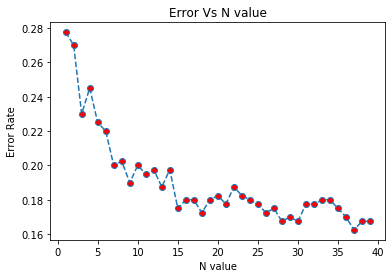

In [41]:
plt.plot(range(1,40),error_rate,'o',markerfacecolor='red',linestyle='dashed') # Plotting the graph 
plt.xlabel("N value")
plt.ylabel("Error Rate")
plt.title("Error Vs N value")
#After looking at the graph we can choose value near 21 or near 30